In [ ]:
%%capture
!pip install unsloth
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

# Load Fine-tuned Model
To load a different model, adjust model_name parameter to choose another from the model list. The first 4 listed models generalize perfectly up to 10D addition.
The cirriculum models generalize up to 5D, 8D and 10D respectively and all slightly generalize beyond 10D addition. 

In [ ]:
from unsloth import FastLanguageModel
import torch

model_list = ["StudyPanda/12500_DeetPad_1024_context", #12.5k examples Detailed scratchpad
              "StudyPanda/50000_DeetPad_1024_context", #50k examples Detailed scratchpad
              "StudyPanda/150000_SimpPad", #150k examples simple scratchpad
              "StudyPanda/300000_SimpPad", #300k examples simple scratchpad
              "StudyPanda/Cirriculum_1", #Trained up to 5D
              "StudyPanda/Cirriculum_2", #Trained up to 8D
              "StudyPanda/Cirriculum_3", #Trained up to 10D
              ]


model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = model_list[4],
    max_seq_length = 2048,
    dtype = None,
    load_in_4bit = False,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2024.11.10: Fast Llama patching. Transformers:4.46.2.
   \\   /|    GPU: NVIDIA L4. Max memory: 22.168 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 8.9. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/97.3M [00:00<?, ?B/s]

Unsloth 2024.11.10 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


# Evaluate the Models
To change how far the evaluation goes, change op1 and op=2.

In [ ]:
import random
import json

op1 = 16
op2 = 16

FastLanguageModel.for_inference(model) #required for unsloth models

accuracies = []
e = open('errors.txt','w')
c = open('correct.txt','w')

for a in range(1,op1):
    for b in range(1,op2):
        #ensure that num_examples is divisible by batch size
        num_examples = 50
        batch_size = 50

        num_correct = 0
        for _ in range(num_examples//batch_size):
            #This is each batch
            torch.cuda.empty_cache()

            #filling in the inputs list
            messages = []
            gts = []
            for _ in range(batch_size):
                x = random.randint(10**(a-1), 10**(a)-1)
                y = random.randint(10**(b-1), 10**(b)-1)
                messages.append([{"role": "user", "content": f"{x}+{y}="},])
                gts.append(f"{x+y}")

            #inference
            model_inputs = tokenizer.apply_chat_template(messages, add_generation_prompt=True,padding=True,return_tensors='pt',return_dict=True).to('cuda')
            model_outputs = model.generate(**model_inputs, max_length = 2048)
            response = tokenizer.batch_decode(model_outputs, skip_special_tokens=True) #list of strings

            #count number of correct responses in batch
            for i,r in enumerate(response):
                gt = gts[i]
                LLM = r[-len(gt):]
                if LLM == gt:
                    num_correct += 1
                    c.write(json.dumps({"GT": gt, "LLM": r}) + '\n')
                else:
                    e.write(json.dumps({"GT": gt, "LLM": r}) + '\n')

        accuracy = {'a': a, 'b': b, 'accuracy': num_correct/num_examples}
        print(accuracy)
        accuracies.append(accuracy)

with open('accuracy.json', 'w') as f:
    json.dump(accuracies,f)

e.close()
c.close()

{'a': 1, 'b': 1, 'accuracy': 1.0}
{'a': 1, 'b': 2, 'accuracy': 1.0}
{'a': 1, 'b': 3, 'accuracy': 1.0}
{'a': 1, 'b': 4, 'accuracy': 1.0}
{'a': 1, 'b': 5, 'accuracy': 1.0}
{'a': 1, 'b': 6, 'accuracy': 0.54}
{'a': 1, 'b': 7, 'accuracy': 0.36}
{'a': 1, 'b': 8, 'accuracy': 0.3}
{'a': 1, 'b': 9, 'accuracy': 0.18}
{'a': 1, 'b': 10, 'accuracy': 0.26}
{'a': 1, 'b': 11, 'accuracy': 0.14}
{'a': 1, 'b': 12, 'accuracy': 0.14}
{'a': 1, 'b': 13, 'accuracy': 0.08}
{'a': 1, 'b': 14, 'accuracy': 0.1}
{'a': 1, 'b': 15, 'accuracy': 0.02}
{'a': 2, 'b': 1, 'accuracy': 1.0}
{'a': 2, 'b': 2, 'accuracy': 1.0}
{'a': 2, 'b': 3, 'accuracy': 1.0}
{'a': 2, 'b': 4, 'accuracy': 1.0}
{'a': 2, 'b': 5, 'accuracy': 1.0}
{'a': 2, 'b': 6, 'accuracy': 0.42}
{'a': 2, 'b': 7, 'accuracy': 0.06}
{'a': 2, 'b': 8, 'accuracy': 0.04}
{'a': 2, 'b': 9, 'accuracy': 0.06}
{'a': 2, 'b': 10, 'accuracy': 0.08}
{'a': 2, 'b': 11, 'accuracy': 0.06}
{'a': 2, 'b': 12, 'accuracy': 0.02}
{'a': 2, 'b': 13, 'accuracy': 0.02}
{'a': 2, 'b': 14, 'acc

'artifact = wandb.Artifact(name="COT_AccuraciesnOutputs", type="results")\nartifact.add_file("errors.txt")\nartifact.add_file("correct.txt")\nartifact.add_file("accuracy.json")\nwandb.log_artifact(artifact)\n\nwandb.finish()'

# Result Visualization!

In [ ]:
# Import necessary libraries
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the JSON file
with open("accuracy.json", "r") as file:
    data = json.load(file)


df = pd.DataFrame(data)
df.rename(columns={"a": "operand_length_1", "b": "operand_length_2"}, inplace=True)
heatmap_data = df.pivot(index="operand_length_1", columns="operand_length_2", values="accuracy")

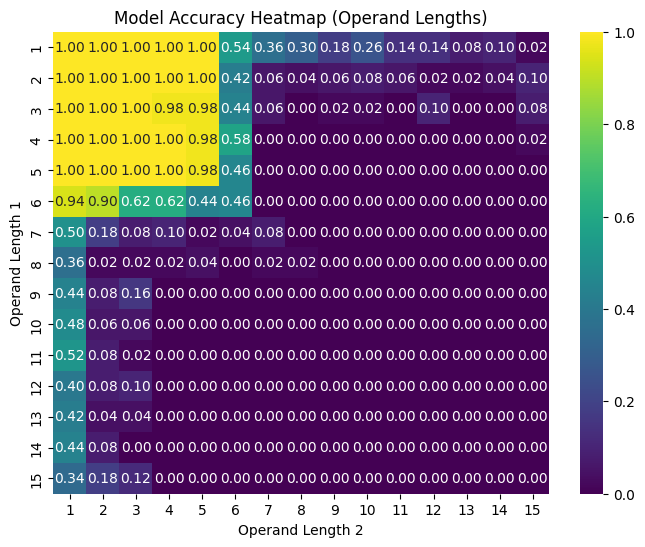

In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", cbar=True, fmt=".2f")
plt.title("Model Accuracy Heatmap (Operand Lengths)")
plt.xlabel("Operand Length 2")
plt.ylabel("Operand Length 1")
plt.show()